In [42]:
# Импорт всех необходимых библиотек
import pandas as pd
import seaborn as sns

In [47]:
# Функционал для анализа
def load_data() -> pd.DataFrame:
    """Загружает данные из всех файло и объединяет их в один датасет
    return: объединенный датафрейм
    """
    data_white = pd.read_csv("data/winequality-white.csv", sep=';') # Читаем информацию про белые вина
    data_white['category'] = pd.Series(['white']*data_white.shape[0]) # Добавляем категоральный признак по типу вина
    data_red = pd.read_csv("data/winequality-red.csv", sep=';') # Читаем информацию про красные вина
    data_red['category'] = pd.Series(['red']*data_red.shape[0]) # Добавляем категоральный признак по типу вина
    data = pd.concat([data_red, data_white], ignore_index=True) # Объединяем данные в общий датасет
    return data


def show_pairplot(data: pd.DataFrame) -> None:
    """Рисует зависимости между всеми переменными

    Args:
        data (pd.DataFrame): датасет для визуализации
    """
    sns.pairplot(data=data, hue='category', height=1.5)
    
    
def get_correlation(data: pd.DataFrame, feature: str, target:str = 'quality') -> float:
    """Считает коэффициент корреляции признака и таргета

    Args:
        data (pd.DataFrame): датасет, в котором считаем корреляцию
        feature (str): признак для изучения
        target (str, optional): таргет для вычисления значения. Defaults to 'quality'.

    Returns:
        float: коэффициент корреляции
    """
    if feature not in data or target not in data:
        raise ValueError("Wrong feature or target name") # Если переданный признак или таргет отсутсвуют в датасете, то вызываем ошибку
    
    correlation_matrix =  data.corr() # Создаем матрицу корреляций
    correlation_feature_target = correlation_matrix.loc[feature, target] # Получаем корреляцию между нужными признаками
    
    return correlation_feature_target


def get_maen_feature_by_category(data: pd.DataFrame, feature: str, category: str) -> float:
    """_summary_

    Args:
        data (pd.DataFrame): датасет
        feature (str): признак, по которому считаем среднее
        category (str): категория, для которой считаем среднее (red, white, all)

    Returns:
        float: среднее значение признака по категории
    """
    if feature not in data:
        raise ValueError("Wrong feature name") # Вызываем ошибку, если в датасете нет переданного признака
    if category not in ['red', 'white', 'all']:
        raise ValueError("Wrong category") # Вызываем ошибку, если переданной категории не существует
    
    # В зависимости от случая считаем среднее
    if category == 'all':
        mean = data[feature].mean()
    else:
        mean = data[data['category'] == category][feature].mean()
        
    return mean

def get_most_alcoholy_wine_category(data: pd.DataFrame) -> str:
    """Исчет категорию самого крепкого вина

    Args:
        data (pd.DataFrame): датасет для поиска

    Returns:
        str: категория самого крепкого вина
    """
    max_alcohol_index = data['alcohol'].idxmax() # Находим индекс строки с максимальным значением в столбце "alcohol"
    category = data.loc[max_alcohol_index, 'category']  # Получаем значение столбца "category" для найденного индекса
    
    return category

def get_median_residual_sugar_with_quality_more_then_value(data: pd.DataFrame, value: int) -> float:
    """Считаем медианное занчение сахара для вин с качеством больше заданного

    Args:
        data (pd.DataFrame): датасет
        value (int): порог качества
        
    Returns:
        float: среднее значения сахара у подходящих вин
    """
    
    median = data[data['quality'] > value]['residual sugar'].median() # Считаем медиану для подходящих вин
    return median

In [48]:
# Загружаем датасет
data = load_data()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [49]:
# Смотрим основные характерстики датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  category              6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


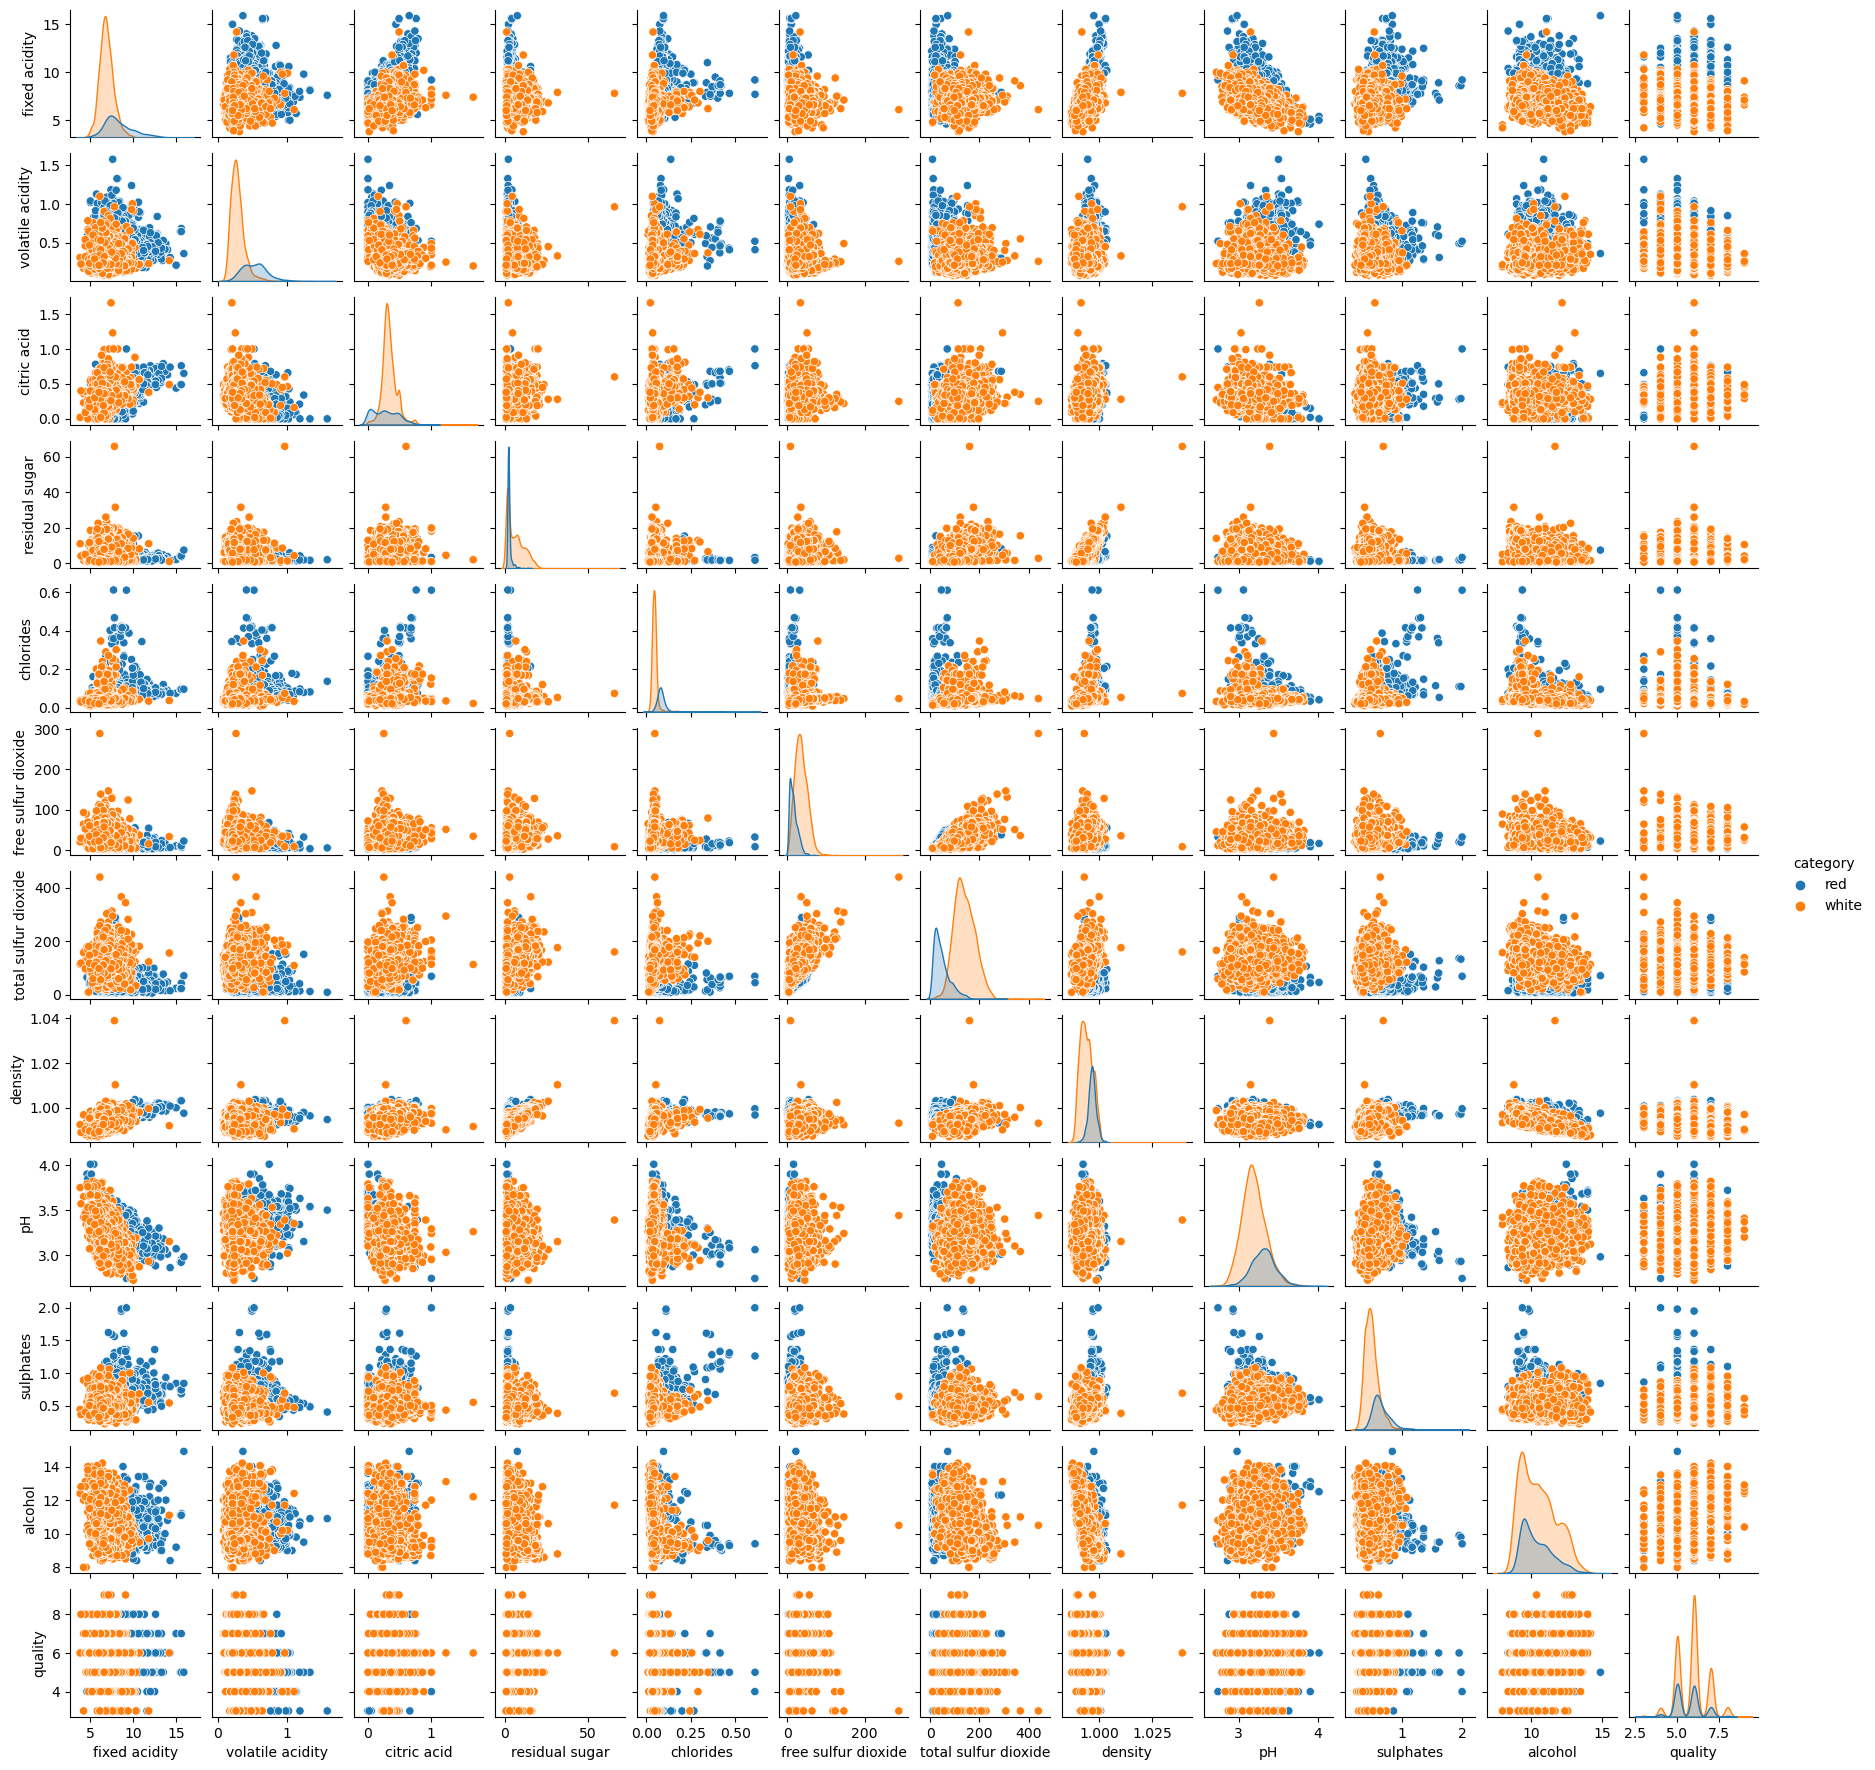

In [38]:
# Смотрим на график зависимостей
show_pairplot(data)

In [51]:
# Смотрим различные корреляции
data_for_corr = data.copy().drop(["category"], axis=1)

print("ph и quality: ", get_correlation(data_for_corr, 'pH', 'quality'))
print("density и residual sugar", get_correlation(data_for_corr, "density", "residual sugar"))

max = 0
max_col = None
for col in data_for_corr.drop(['quality'], axis=1).columns.to_list():
    corr = get_correlation(data_for_corr, col)
    if  corr > max:
        max = corr
        max_col = col
        
print(f"Max correlation feture is {max_col}: ", max)

ph и quality:  0.019505703714432703
density и residual sugar 0.5525169502932569
Max correlation feture is alcohol:  0.4443185200076552


In [24]:
# Считаем различные средние значения для категорий
print("Mean alcohol for all wines", get_maen_feature_by_category(data, 'alcohol', 'all'))
print("Mean fixed acidity for red wines", get_maen_feature_by_category(data, 'fixed acidity', 'red'))
print("Mean quality for whire wines", get_maen_feature_by_category(data, 'quality', 'white'))

Mean alcohol for all wines 10.491800831152839
Mean fixed acidity for red wines 8.31963727329581
Mean quality for whire wines 5.87790935075541


In [25]:
# Смотрим категория с самым крепким вином
print("Most alcoholy wine is ", get_most_alcoholy_wine_category(data))

Most alcoholy wine is  red


In [26]:
# Смотрим медианное значение сахара в зависимости от качества
print("Median residual sugar for qulity > 6: ", get_median_residual_sugar_with_quality_more_then_value(data, 6))

Median residual sugar for qulity > 6:  2.9
